1. Definición del Objetivo

2. Contexto Comercial

Las calificaciones crediticias corporativas, proporcionan una evaluación sobre la solvencia crediticia de una empresa y actúan como un indicador financiero fundamental para los potenciales inversionistas. 

Estas ayudan a entregar a los futuros accionistas una idea concreta sobre el riesgo asociado a la inversión en una empresa en particular, a través de los rendimientos de las inversiones crediticias que posee la empresa. 

Toda empresa aspira a obtener una buena calificación crediticia con el objetivo de buscar más inversionistas y tasas de interés de deuda más bajos.

3. Problema Comercial

4. Data Acquisition

4.1 Importar Librerías

In [1]:
# Importar Librerias
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

4.2 Obtención Datos

In [2]:
# Fuente: https://www.kaggle.com/datasets/kirtandelwadia/corporate-credit-rating-with-financial-ratios/data
url = 'https://raw.githubusercontent.com/jfdonosom/Data_Bases/main/Corporate_Credit_Rating_With_Financial_Ratios.csv'
df = pd.read_csv(url)
df.head(5)

,Rating Agency,Corporation,Rating,Rating Date,CIK,Binary Rating,SIC Code,Sector,Ticker,Current Ratio,...,EBITDA Margin,Pre-Tax Profit Margin,Net Profit Margin,Asset Turnover,ROE - Return On Equity,Return On Tangible Equity,ROA - Return On Assets,ROI - Return On Investment,Operating Cash Flow Per Share,Free Cash Flow Per Share
0,Standard & Poor's Ratings Services,American States Water Co.,A-,2010-07-30,1056903,1,4941.0,Utils,AWR,1.1507,...,28.9834,13.6093,8.3224,0.3173,8.1724,8.1978,2.6385,4.4530,1.9957,-0.1333
1,Standard & Poor's Ratings Services,Automatic Data Processing Inc.,AAA,2010-09-16,8670,1,7374.0,BusEq,ADP,1.1129,...,23.9379,20.8699,13.5690,0.3324,22.0354,47.2858,4.4944,21.8765,0.2501,0.3132
2,Standard & Poor's Ratings Services,Avnet Inc.,BBB-,2010-11-23,8858,1,5065.0,Shops,AVT,1.9276,...,3.6338,3.0536,2.1418,2.4620,13.6376,16.7991,5.2731,9.6494,-7.6079,-7.3231
3,Standard & Poor's Ratings Services,California Water Service Co.,AA-,2010-06-29,1035201,1,4941.0,Utils,CWT,0.8358,...,27.9377,15.1135,9.0246,0.2946,9.6412,9.7015,2.6583,5.1018,1.7438,-0.8999
4,Standard & Poor's Ratings Services,Cardinal Health Inc.,A,2010-07-14,721371,1,5122.0,Shops,CAH,1.2931,...,1.5847,1.2304,0.6518,4.9276,11.1256,19.4184,2.9364,8.1844,1.9725,2.4174


In [3]:
df.shape

(7805, 25)

In [4]:
df.columns

Index(['Rating Agency', 'Corporation', 'Rating', 'Rating Date', 'CIK',
       'Binary Rating', 'SIC Code', 'Sector', 'Ticker', 'Current Ratio',
       'Long-term Debt / Capital', 'Debt/Equity Ratio', 'Gross Margin',
       'Operating Margin', 'EBIT Margin', 'EBITDA Margin',
       'Pre-Tax Profit Margin', 'Net Profit Margin', 'Asset Turnover',
       'ROE - Return On Equity', 'Return On Tangible Equity',
       'ROA - Return On Assets', 'ROI - Return On Investment',
       'Operating Cash Flow Per Share', 'Free Cash Flow Per Share'],
      dtype='object')

4.3 Descripción Variables

In [5]:
# Fuentes: https://finviz.com/help/screener.ashx , https://www.sec.gov/search-filings/standard-industrial-classification-sic-code-list ,  

# Corporation: Nombre de la Empresa.
# Rating: Calificación Otorgada por la Agencia Especialista - Calificación S&P Decreciente {AAA, AA+, AA, AA−, A+, A, A−, BBB+, BBB, BBB−, BB+, BB, BB−, B+, B, B−, CCC+, CCC, CCC−, CC, C, D}
# Rating Date: Fecha de Calificación.
# Binary Rating: Calificación Binaria (1: Empresas con Grado de Inversión, 0: Empresas Basura) 
# SIC Code: Estándar Industrial de Clasificación (USA) - Indica el tipo de Negocio asociado a la Empresa.
# Sector: Grupos en función de las actividades de la Compañia en las cuales se agrupan diferentes Empresas. Relación Directa con el Código SIC.
# Ticker: Abreviación Empresa para Cotizar en Bolsa (Identificador Único)
# Current Ratio: Radio de Liquidez, que mide la capacidad de una empresa para pagar sus obligaciones en el corto plazo. Ratio Actual = Activos Actuales / Pasivos Actuales.
# Long-term Debt / Capital: Ratio que mide el Apalancamiento Financiero de una Compañía. Indica que proporción de las acciones y deuda la compañía está utilizando para financiar sus activos en el Largo Plazo. (Pasivos LP / Capital Accionistas)
# Debt/Equity Ratio: Ratio que mide el Apalancamiento Financiero de una Compañía. Indica que proporción de las acciones y deuda la compañía está utilizando para financiar sus activos en el Corto Plazo. (Pasivos Actuales / Capital Accionistas)                                              
# Gross Margin: Porcentaje del total de Ingresos por Ventas que la Compañía retiene después de incurrir en los costos directos de producción de un Bien o Servicio. Margen Bruto = (Ingresos Ventas - Costos Fijos Producción) / Ingresos Ventas 
# Operating Margin: Indica qué proporción de la ganancia de la compañía queda, luego de pagar los costos variables de producción, tales como salarios, insumos, etc. Margen Operacional = Ingresos Operacionales / Ingresos Totales Ventas. 
# EBIT Margin: Earnings Before Interest and Taxes. Ratio que nos indica la rentabilidad de una empresa. Se calcula como las ganancias de esta menos los gatos, exluyendo los impuestos e intereses.
# EBITDA Margin: Earnings Before Interest, Taxes, Depreciation and Amortization. Ratio o medida de rentabilidad, alternativo al Ingreso Neto, el cual busca representar el beneficio en efectivo generado por las operaciones de la compañía.
# Pre-Tax Profit Margin: Mide las ganancias remantentes de la empresa, después de que los gastos operacionales y no operacionales, sin considerar los impuestos, hayan sido descontados. Ganancia Previa a los Impuestos = EBT (Ganancias antes de Impuestos) / Ingresos.
# Net Profit Margin: Ratio de Rentabilidad que mide cuanto de cada Dólar por Ventas, la compañía mantiene como ganancia. Beneficio Neto = Ganancia Neta / Ingresos por Venta.
# Asset Turnover: Mide la eficiencia de los activos de una compañía para generar Ingresos o Ventas. Rotación de Activos = Ingresos por Ventas / Promedio Total de Activos.
# ROE - Return On Equity: Ratio de Rentabilidad que indica cuanta ganancia genera la compañía con el dinero que lo accionistas han invertido en ella. ROE = Ingreso Neto Anual / Capital Accionistas
# Return On Tangible Equity (ROTE): Mide la Eficiencia con la cual una compañía opera y utiliza sus Activos Tangibles para generar Ingresos en el Largo Plazo. ROTE = Ingreso Neto Anual / (Promedio Capital Accionistas - Activos Intangibles)
# ROA - Return On Assets: Indicador que nos da una idea sobre que tan eficiente es la gerencia de una compañía utilizando sus activos para generar ingresos. ROA = ingresos Netos Anuales / Total Activos.
# ROI - Return On Investment: Medida de Desempeño, utilizada para evaluar la eficiencia de una inversión. ROI = (Ingresos de Inversión - Costos de Inversión) / Costos de Inversión
# Operating Cash Flow Per Share: Cantidad de efectivo que genera una empresa a partir de los Ingresos que genera, excluyendo los costos asociados con la Inversión de Capital a Largo Plazo. Medido en lo últimos 12 Meses (TTM)
# Free Cash Flow Per Share: Medida de la Flexibilidad Financiera de una empresa que se determina dividiendo el Flujo de Caja Libre por el número total de Acciones en Circulación. Indicador de los cambios en las ganancias por acción.

In [6]:
df['Rating Agency'].unique()

array(["Standard & Poor's Ratings Services", 'DBRS',
       "Moody's Investors Service", 'Fitch Ratings',
       'Japan Credit Rating Agency,Ltd.',
       'HR Ratings de Mexico S.A. de C.V.', 'Egan-Jones Ratings Company'],
      dtype=object)

In [7]:
# Eliminamos Columna Rating Agency (axis=0 filas, axis=1 columnas)
df = df.drop('Rating Agency', axis=1)
df.head(5)

,Corporation,Rating,Rating Date,CIK,Binary Rating,SIC Code,Sector,Ticker,Current Ratio,Long-term Debt / Capital,...,EBITDA Margin,Pre-Tax Profit Margin,Net Profit Margin,Asset Turnover,ROE - Return On Equity,Return On Tangible Equity,ROA - Return On Assets,ROI - Return On Investment,Operating Cash Flow Per Share,Free Cash Flow Per Share
0,American States Water Co.,A-,2010-07-30,1056903,1,4941.0,Utils,AWR,1.1507,0.4551,...,28.9834,13.6093,8.3224,0.3173,8.1724,8.1978,2.6385,4.4530,1.9957,-0.1333
1,Automatic Data Processing Inc.,AAA,2010-09-16,8670,1,7374.0,BusEq,ADP,1.1129,0.0072,...,23.9379,20.8699,13.5690,0.3324,22.0354,47.2858,4.4944,21.8765,0.2501,0.3132
2,Avnet Inc.,BBB-,2010-11-23,8858,1,5065.0,Shops,AVT,1.9276,0.2924,...,3.6338,3.0536,2.1418,2.4620,13.6376,16.7991,5.2731,9.6494,-7.6079,-7.3231
3,California Water Service Co.,AA-,2010-06-29,1035201,1,4941.0,Utils,CWT,0.8358,0.4708,...,27.9377,15.1135,9.0246,0.2946,9.6412,9.7015,2.6583,5.1018,1.7438,-0.8999
4,Cardinal Health Inc.,A,2010-07-14,721371,1,5122.0,Shops,CAH,1.2931,0.2644,...,1.5847,1.2304,0.6518,4.9276,11.1256,19.4184,2.9364,8.1844,1.9725,2.4174


In [8]:
# Equilibrio Muestra.
(df.value_counts('Rating')/len(df)*100).round(1).sort_index(ascending=True)

Rating
A       10.7
A+       6.1
A-       9.3
AA       2.4
AA+      0.9
AA-      3.3
AAA      1.2
B        4.0
B+       5.4
B-       3.7
BB       5.8
BB+      7.0
BB-      5.5
BBB     11.7
BBB+    10.8
BBB-     9.0
C        0.1
CC       0.2
CC+      0.0
CCC      0.8
CCC+     1.9
CCC-     0.1
D        0.1
Name: count, dtype: float64

In [9]:
# Ordinal Encoder
from sklearn.preprocessing import OrdinalEncoder
ord = OrdinalEncoder()

# Transformar los datos
df['Rating_oe'] = ord.fit_transform(df[['Rating']]).astype('int')

In [10]:
df[['Rating','Rating_oe']].sort_values(by='Rating')

,Rating,Rating_oe
1511,A,0
4699,A,0
4700,A,0
4701,A,0
4702,A,0
...,...,...
712,D,22
3438,D,22
1866,D,22
7088,D,22


In [11]:
((df.value_counts('Binary Rating')/len(df))*100).round(1)

Binary Rating
1    65.3
0    34.7
Name: count, dtype: float64

<Axes: >

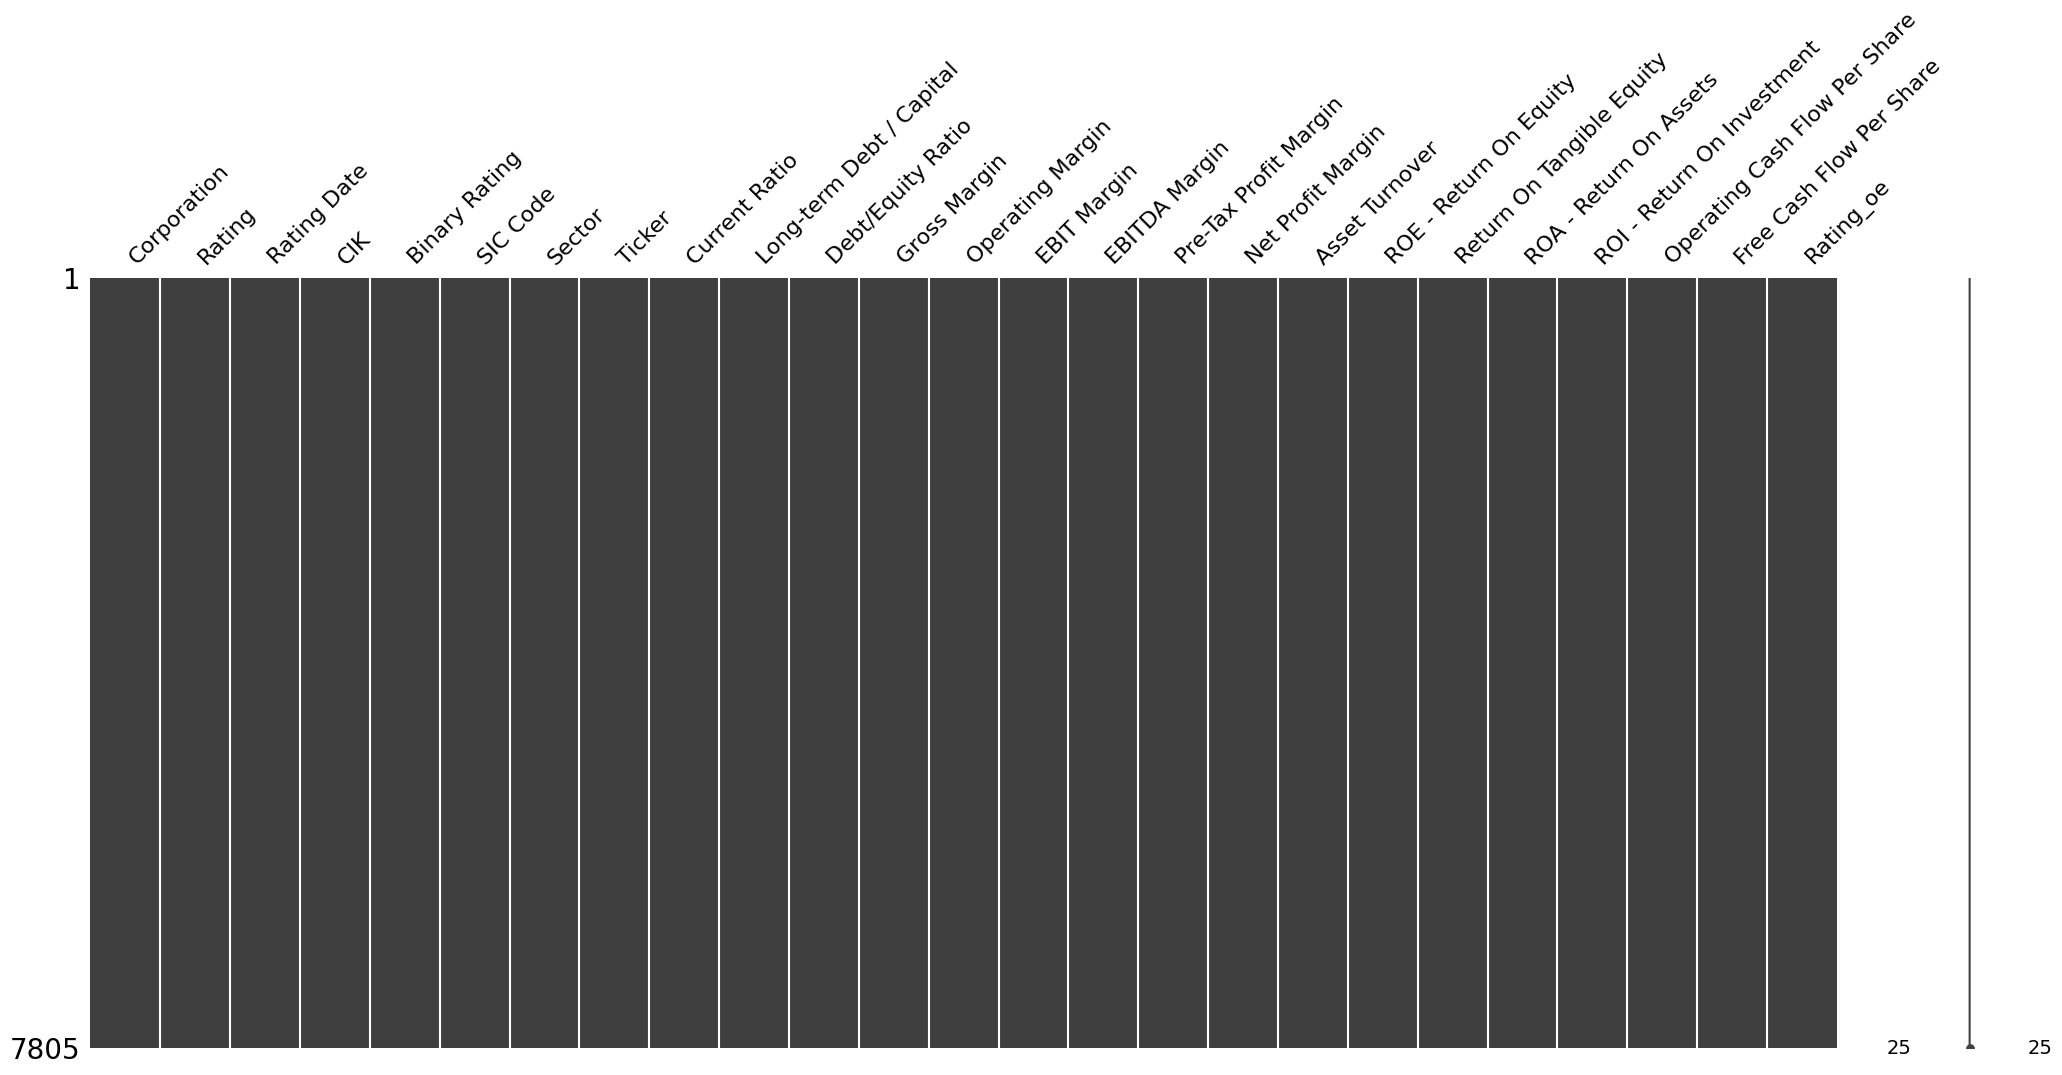

In [12]:
# Valores Faltantes.
msno.matrix(df)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7805 entries, 0 to 7804
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Corporation                    7805 non-null   object 
 1   Rating                         7805 non-null   object 
 2   Rating Date                    7805 non-null   object 
 3   CIK                            7805 non-null   int64  
 4   Binary Rating                  7805 non-null   int64  
 5   SIC Code                       7805 non-null   float64
 6   Sector                         7805 non-null   object 
 7   Ticker                         7805 non-null   object 
 8   Current Ratio                  7805 non-null   float64
 9   Long-term Debt / Capital       7805 non-null   float64
 10  Debt/Equity Ratio              7805 non-null   float64
 11  Gross Margin                   7805 non-null   float64
 12  Operating Margin               7805 non-null   f

In [14]:
# Cambiar Formato Object a Category.
Columnas = ['Rating', 'Binary Rating', 'SIC Code', 'Sector']
def Cambio_Formato(df, Columnas):
    for i in Columnas:
        df[i] = df[i].astype('category')
    return df

df = Cambio_Formato(df, Columnas)

In [15]:
df['Corporation'] = df['Corporation'].astype('string')
df['Ticker'] = df['Ticker'].astype('string')

In [16]:
# Año, Mes
df['Rating Date'] = pd.to_datetime(df['Rating Date'])
df['Year'] = df['Rating Date'].dt.year.astype('int64')
df['Month'] = df['Rating Date'].dt.month.astype('int64')

In [17]:
df = df.drop(columns=['Rating Date','SIC Code'])
df.head(5)

,Corporation,Rating,CIK,Binary Rating,Sector,Ticker,Current Ratio,Long-term Debt / Capital,Debt/Equity Ratio,Gross Margin,...,Asset Turnover,ROE - Return On Equity,Return On Tangible Equity,ROA - Return On Assets,ROI - Return On Investment,Operating Cash Flow Per Share,Free Cash Flow Per Share,Rating_oe,Year,Month
0,American States Water Co.,A-,1056903,1,Utils,AWR,1.1507,0.4551,0.8847,77.6230,...,0.3173,8.1724,8.1978,2.6385,4.4530,1.9957,-0.1333,2,2010,7
1,Automatic Data Processing Inc.,AAA,8670,1,BusEq,ADP,1.1129,0.0072,0.0073,43.6619,...,0.3324,22.0354,47.2858,4.4944,21.8765,0.2501,0.3132,6,2010,9
2,Avnet Inc.,BBB-,8858,1,Shops,AVT,1.9276,0.2924,0.4255,11.9008,...,2.4620,13.6376,16.7991,5.2731,9.6494,-7.6079,-7.3231,15,2010,11
3,California Water Service Co.,AA-,1035201,1,Utils,CWT,0.8358,0.4708,0.9491,64.5096,...,0.2946,9.6412,9.7015,2.6583,5.1018,1.7438,-0.8999,5,2010,6
4,Cardinal Health Inc.,A,721371,1,Shops,CAH,1.2931,0.2644,0.4036,3.8385,...,4.9276,11.1256,19.4184,2.9364,8.1844,1.9725,2.4174,0,2010,7


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7805 entries, 0 to 7804
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Corporation                    7805 non-null   string  
 1   Rating                         7805 non-null   category
 2   CIK                            7805 non-null   int64   
 3   Binary Rating                  7805 non-null   category
 4   Sector                         7805 non-null   category
 5   Ticker                         7805 non-null   string  
 6   Current Ratio                  7805 non-null   float64 
 7   Long-term Debt / Capital       7805 non-null   float64 
 8   Debt/Equity Ratio              7805 non-null   float64 
 9   Gross Margin                   7805 non-null   float64 
 10  Operating Margin               7805 non-null   float64 
 11  EBIT Margin                    7805 non-null   float64 
 12  EBITDA Margin                  780

In [19]:
# Valores Duplicados.
# Se generan valores duplicados, al eliminar la fecha y trabajar con Intervalos de Meses y Años.
df.duplicated().sum()

294

In [20]:
duplicados = df[['Year', 'Month', 'Corporation', 'Binary Rating', 'Rating']].duplicated()
df_duplicados = df[duplicados][['Year', 'Month', 'Corporation', 'Binary Rating', 'Rating']].sort_values(by=['Corporation', 'Year', 'Month'])
print(df_duplicados)

      Year  Month                    Corporation Binary Rating Rating
1439  2013     11                     3M COMPANY             1     AA
4785  2015      9       ADVANCE AUTO PARTS, INC.             1     A-
2843  2014      8                          AECOM             0    BB-
2845  2014     10                          AECOM             0    BB-
2880  2014      7  AMERICAN AXLE & MANUFACTURING             0    BB+
...    ...    ...                            ...           ...    ...
6803  2015      9            XPO Logistics, Inc.             1   BBB-
2809  2013      5               Xcel Energy Inc.             1   BBB+
6814  2015     10              YUM! BRANDS, INC.             1    BBB
6815  2015     10              YUM! BRANDS, INC.             1    BBB
4767  2014      9     iHeartCommunications, Inc.             0    CCC

[294 rows x 5 columns]


In [29]:
df.drop_duplicates(inplace=True)

In [30]:
df.duplicated().sum()

0

In [31]:
df.describe().round(1)

,CIK,Current Ratio,Long-term Debt / Capital,Debt/Equity Ratio,Gross Margin,Operating Margin,EBIT Margin,EBITDA Margin,Pre-Tax Profit Margin,Net Profit Margin,Asset Turnover,ROE - Return On Equity,Return On Tangible Equity,ROA - Return On Assets,ROI - Return On Investment,Operating Cash Flow Per Share,Free Cash Flow Per Share,Rating_oe,Year,Month
count,7511.0,7511.0,7511.0,7511.0,7511.0,7511.0,7511.0,7511.0,7511.0,7511.0,7511.0,7511.0,7511.0,7511.0,7511.0,7511.0,7511.0,7511.0,7511.0,7511.0
mean,734717.8,1.9,0.5,0.1,42.4,11.4,11.4,19.9,8.5,5.9,0.8,15.4,21.2,4.5,7.0,0.5,0.1,8.6,2013.9,6.7
std,515671.6,1.9,2.7,35.0,23.7,25.8,25.8,24.6,28.2,24.4,0.7,231.5,463.8,9.3,24.8,6.1,7.3,5.6,1.4,3.2
min,1750.0,0.2,-86.4,-1473.1,-87.7,-461.8,-461.8,-360.8,-476.0,-414.8,0.1,-11258.2,-14023.3,-226.4,-745.5,-91.3,-130.7,0.0,2010.0,1.0
25%,93410.0,1.1,0.3,0.4,22.5,6.0,6.1,11.0,4.0,2.6,0.4,6.0,-11.7,2.4,3.6,-0.4,-0.7,2.0,2013.0,4.0
50%,875045.0,1.5,0.4,0.8,39.6,12.1,12.1,18.3,9.6,6.9,0.7,12.4,10.6,4.7,7.4,0.2,0.1,10.0,2014.0,7.0
75%,1091587.0,2.2,0.5,1.2,59.6,19.3,19.4,30.5,16.6,12.2,1.0,20.3,26.9,7.8,12.4,1.1,1.0,13.0,2015.0,9.0
max,1748790.0,34.1,171.5,194.4,100.0,94.0,94.0,286.5,221.3,219.4,8.5,7038.5,9883.0,114.7,466.7,282.2,107.7,22.0,2016.0,12.0


In [32]:
df.describe(include='category')

,Rating,Binary Rating,Sector
count,7511,7511,7511
unique,23,2,12
top,BBB,1,Other
freq,870,4880,1202


In [33]:
df.describe(include='string')

,Corporation,Ticker
count,7511,7511
unique,1377,678
top,Tenet Healthcare Corp.,DTE
freq,23,41


In [26]:
# Valores Imposibles, Outliers.

In [34]:
columns_float64 = df.select_dtypes(include='float64').columns
print(columns_float64)

Index(['Current Ratio', 'Long-term Debt / Capital', 'Debt/Equity Ratio',
       'Gross Margin', 'Operating Margin', 'EBIT Margin', 'EBITDA Margin',
       'Pre-Tax Profit Margin', 'Net Profit Margin', 'Asset Turnover',
       'ROE - Return On Equity', 'Return On Tangible Equity',
       'ROA - Return On Assets', 'ROI - Return On Investment',
       'Operating Cash Flow Per Share', 'Free Cash Flow Per Share'],
      dtype='object')


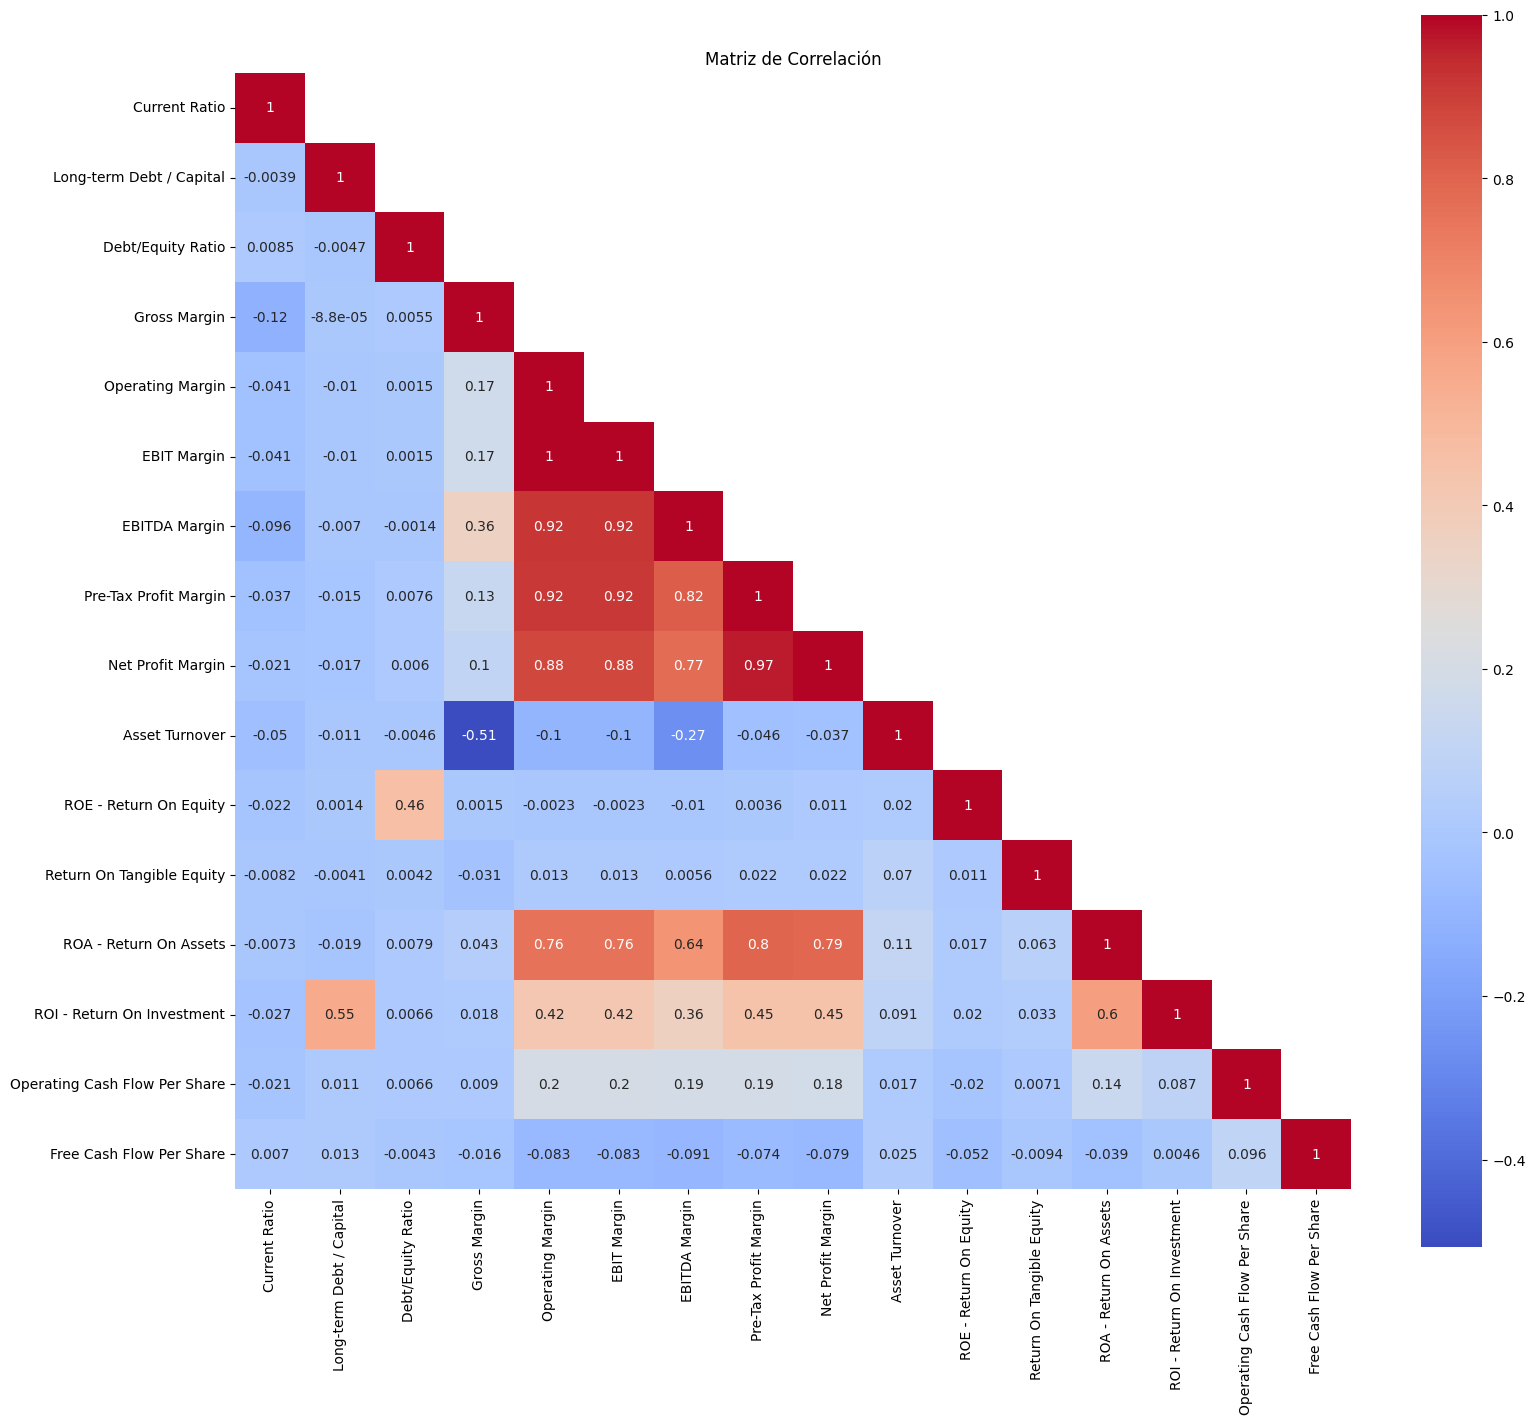

In [35]:
# Correlación Entre Variables.
df_float64 = df[columns_float64]
matriz_corr = df_float64.corr()
mask = np.triu(np.ones_like(matriz_corr, dtype=bool), k=1)

# Gráfico de correlación
plt.figure(figsize=(18, 16))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', mask=mask, square=True)
plt.title('Matriz de Correlación')
plt.show()